In [1]:
import os
import pandas as pd
import numpy as np
import tsfel
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
'''
    Import aquisitions
'''

lst = os.listdir('acquisitions') # your directory path
n_aq = len(lst)
X_data = []
y_data = []

for acq in lst:
    try:
        acq_info = acq.split('_')
        acq_ind = acq_info[2]
        y_data.append(acq_info[3].split('.')[0])
        data = pd.read_csv('acquisitions/' + acq, names = ['time', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
        #data.append([acq_ind, y_label])
        X_data.append([acq_info[1],data,acq_ind])
        
        #print(pos_data)
    except:
        print(acq)

.ipynb_checkpoints


In [3]:
X_data

[['002',
                  time     acc_x     acc_y     acc_z    gyro_x    gyro_y  \
  0   6471714145254158 -8.649456 -2.017449  3.682554  0.003728 -0.030359   
  1   6471737878717283 -8.013863 -0.198006  5.097609  0.033688 -0.014514   
  2   6471737945384314 -8.005786 -0.072682  5.081159  0.009987 -0.003196   
  3   6471738012051346 -7.989336 -0.303290  5.182854 -0.025432 -0.012650   
  4   6471738078718377 -7.947162 -0.201894  5.217849 -0.031158 -0.003329   
  ..               ...       ...       ...       ...       ...       ...   
  78  6471743145412752 -8.020741 -0.169591  5.149055 -0.000799  0.017443   
  79  6471743212079783 -7.986045 -0.168694  5.150551 -0.003329  0.013049   
  80  6471743278746814 -8.006385 -0.182154  5.184050 -0.010652  0.010120   
  81  6471743345413846 -8.019546 -0.172582  5.161618 -0.006658  0.002264   
  82  6471743412080877 -7.986045 -0.220140  5.128118 -0.003728  0.012650   
  
        gyro_z  
  0  -0.002530  
  1  -0.006658  
  2   0.013715  
  3   0.

In [4]:
movement={'l':'left','r':'right','f':'front','b':'back','o':'still'}

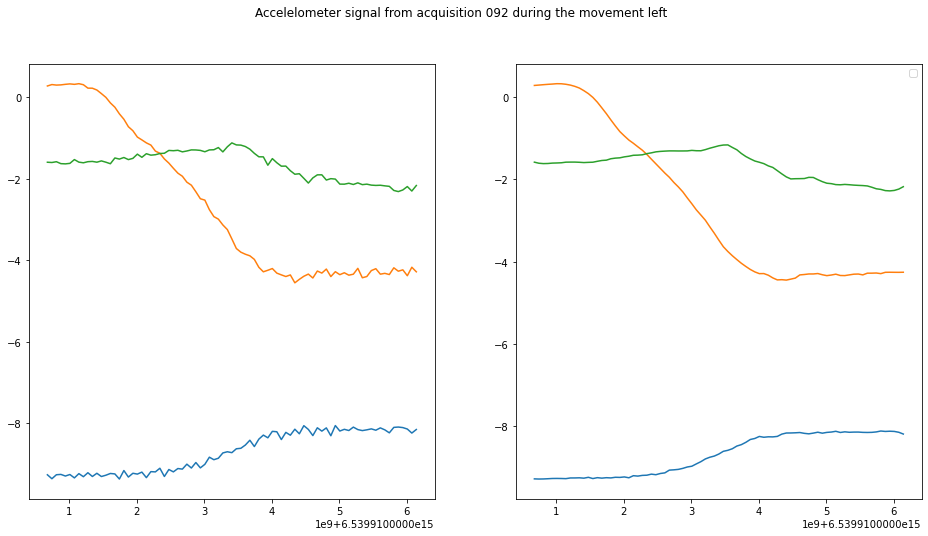

In [5]:
naq = 90

fig, axs = plt.subplots(1,2, figsize=(16, 8))
fig.suptitle('Accelelometer signal from acquisition ' + X_data[naq][0] + ' during the movement '+ movement[y_data[naq-1]])


t = X_data[naq][1]['time']
acc_x = X_data[naq][1]['acc_x']
acc_y = X_data[naq][1]['acc_y']
acc_z = X_data[naq][1]['acc_z']
axs[0].plot(t,acc_x, t, acc_y, t, acc_z)
plt.legend(['acc_x','acc_y','acc_z'])


from scipy.signal import savgol_filter
sav_acc_x = savgol_filter(acc_x, 9, 3)
sav_acc_y = savgol_filter(acc_y, 9, 3)
sav_acc_z = savgol_filter(acc_z, 9, 3)
axs[1].plot(t,sav_acc_x,t,sav_acc_y,t,sav_acc_z)

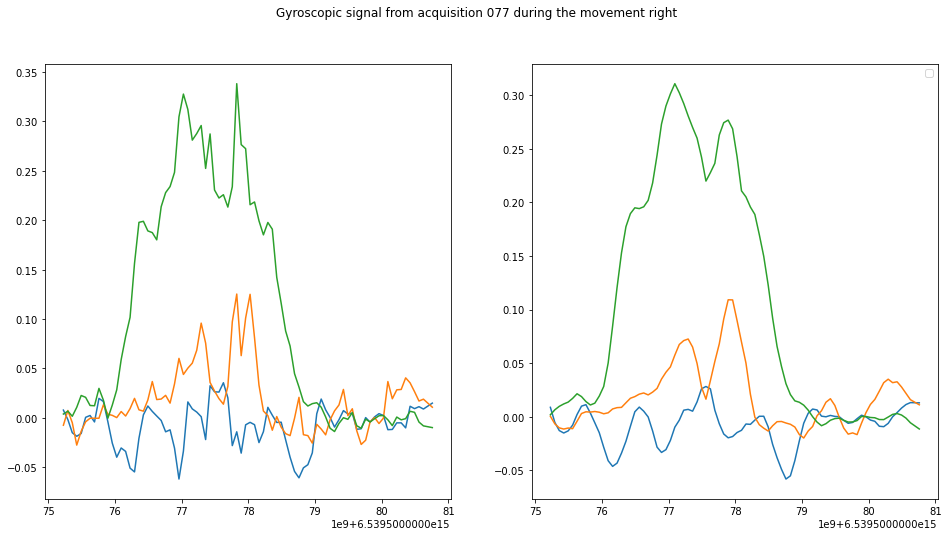

In [6]:
naq= 75

fig, axs = plt.subplots(1,2, figsize=(16, 8))
fig.suptitle('Gyroscopic signal from acquisition ' + X_data[naq][0] + ' during the movement '+ movement[y_data[naq-1]])


t = X_data[naq][1]['time']
gyro_x = X_data[naq][1]['gyro_x']
gyro_y = X_data[naq][1]['gyro_y']
gyro_z = X_data[naq][1]['gyro_z']
axs[0].plot(t,gyro_x, t, gyro_y, t, gyro_z)
plt.legend(['gyro_x','gyro_y','gyro_z'])

sav_gyro_x = savgol_filter(gyro_x, 9, 3)
sav_gyro_y = savgol_filter(gyro_y, 9, 3)
sav_gyro_z = savgol_filter(gyro_z, 9, 3)
axs[1].plot(t,sav_gyro_x,t,sav_gyro_y,t,sav_gyro_z)

In [7]:
X_data_sm = X_data

for naq in range(len(X_data)):
    for signal in ['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z']:
        X_data_sm[naq][1][signal] = savgol_filter(X_data[naq][1][signal],9,3) 

In [8]:
? tsfel.time_series_features_extractor

In [10]:
# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()
time_features = []
# Extract features
for signal in ['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z']:
    dset = [X_data_sm[nn][1][signal] for nn in range(len(X_data_sm))] 
    
    time_features.append(tsfel.time_series_features_extractor(cfg,dset))


*** Feature extraction started ***


C:\Users\HP\AppData\Local\Temp\ipykernel_15456\430390788.py:8: UserWarning: Using default sampling frequency set in configuration file.
  time_features.append(tsfel.time_series_features_extractor(cfg,dset))


C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa


*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\HP\AppData\Local\Temp\ipykernel_15456\430390788.py:8: UserWarning: Using default sampling frequency set in configuration file.
  time_features.append(tsfel.time_series_features_extractor(cfg,dset))


C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa


*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\HP\AppData\Local\Temp\ipykernel_15456\430390788.py:8: UserWarning: Using default sampling frequency set in configuration file.
  time_features.append(tsfel.time_series_features_extractor(cfg,dset))


C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa


*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\HP\AppData\Local\Temp\ipykernel_15456\430390788.py:8: UserWarning: Using default sampling frequency set in configuration file.
  time_features.append(tsfel.time_series_features_extractor(cfg,dset))


C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa


*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\HP\AppData\Local\Temp\ipykernel_15456\430390788.py:8: UserWarning: Using default sampling frequency set in configuration file.
  time_features.append(tsfel.time_series_features_extractor(cfg,dset))


C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa


*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\HP\AppData\Local\Temp\ipykernel_15456\430390788.py:8: UserWarning: Using default sampling frequency set in configuration file.
  time_features.append(tsfel.time_series_features_extractor(cfg,dset))


C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_final = features_final.append(feat)
C:\Users\HP\anaconda3\lib\site-packages\tsfel\feature_extraction\calc_features.py:300: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa


*** Feature extraction finished ***


In [11]:
time_features[0].columns

Index(['0_Absolute energy', '0_Area under the curve', '0_Autocorrelation',
       '0_Centroid', '0_ECDF Percentile Count_0', '0_ECDF Percentile Count_1',
       '0_ECDF Percentile_0', '0_ECDF Percentile_1', '0_ECDF_0', '0_ECDF_1',
       ...
       '0_Wavelet variance_0', '0_Wavelet variance_1', '0_Wavelet variance_2',
       '0_Wavelet variance_3', '0_Wavelet variance_4', '0_Wavelet variance_5',
       '0_Wavelet variance_6', '0_Wavelet variance_7', '0_Wavelet variance_8',
       '0_Zero crossing rate'],
      dtype='object', length=176)

In [12]:
''' 
Rename columns
!!! only run once
'''
run = True
new_column_names=[]
if run:
    i = 0
    for signal in ['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z']:
        new_column_names.append([signal + '|' + time_features[i].columns[n] \
                        for n in range(len(time_features[i].columns))])
        time_features[i].columns = new_column_names[i]
        print(time_features[i].columns)
        i = i + 1   


Index(['acc_x|0_Absolute energy', 'acc_x|0_Area under the curve',
       'acc_x|0_Autocorrelation', 'acc_x|0_Centroid',
       'acc_x|0_ECDF Percentile Count_0', 'acc_x|0_ECDF Percentile Count_1',
       'acc_x|0_ECDF Percentile_0', 'acc_x|0_ECDF Percentile_1',
       'acc_x|0_ECDF_0', 'acc_x|0_ECDF_1',
       ...
       'acc_x|0_Wavelet variance_0', 'acc_x|0_Wavelet variance_1',
       'acc_x|0_Wavelet variance_2', 'acc_x|0_Wavelet variance_3',
       'acc_x|0_Wavelet variance_4', 'acc_x|0_Wavelet variance_5',
       'acc_x|0_Wavelet variance_6', 'acc_x|0_Wavelet variance_7',
       'acc_x|0_Wavelet variance_8', 'acc_x|0_Zero crossing rate'],
      dtype='object', length=176)
Index(['acc_y|0_Absolute energy', 'acc_y|0_Area under the curve',
       'acc_y|0_Autocorrelation', 'acc_y|0_Centroid',
       'acc_y|0_ECDF Percentile Count_0', 'acc_y|0_ECDF Percentile Count_1',
       'acc_y|0_ECDF Percentile_0', 'acc_y|0_ECDF Percentile_1',
       'acc_y|0_ECDF_0', 'acc_y|0_ECDF_1',
       ..

In [13]:
time_features = pd.concat(time_features, axis = 1)

In [14]:
time_features.head()

,acc_x|0_Absolute energy,acc_x|0_Area under the curve,acc_x|0_Autocorrelation,acc_x|0_Centroid,acc_x|0_ECDF Percentile Count_0,acc_x|0_ECDF Percentile Count_1,acc_x|0_ECDF Percentile_0,acc_x|0_ECDF Percentile_1,acc_x|0_ECDF_0,acc_x|0_ECDF_1,...,gyro_z|0_Wavelet variance_0,gyro_z|0_Wavelet variance_1,gyro_z|0_Wavelet variance_2,gyro_z|0_Wavelet variance_3,gyro_z|0_Wavelet variance_4,gyro_z|0_Wavelet variance_5,gyro_z|0_Wavelet variance_6,gyro_z|0_Wavelet variance_7,gyro_z|0_Wavelet variance_8,gyro_z|0_Zero crossing rate
0,5320.491272,6.562297,5320.491272,0.409357,16.0,66.0,-8.007659,-7.990839,0.012048,0.024096,...,0.000008,0.000036,0.000044,0.000029,0.000020,0.000019,0.000020,0.000020,0.000019,15.0
1,6245.195696,7.110730,6245.195696,0.410753,16.0,66.0,-8.712610,-8.645501,0.012048,0.024096,...,0.000002,0.000009,0.000019,0.000036,0.000049,0.000055,0.000052,0.000045,0.000037,10.0
2,6697.900953,7.363813,6697.900953,0.410550,16.0,66.0,-9.004519,-8.957186,0.012048,0.024096,...,0.000057,0.000464,0.000761,0.000725,0.000530,0.000330,0.000190,0.000117,0.000090,12.0
3,6356.469665,7.132471,6356.469665,0.404750,16.0,65.0,-8.837230,-8.783095,0.012195,0.024390,...,0.000088,0.000544,0.001199,0.002038,0.002690,0.002976,0.003056,0.003149,0.003339,12.0
4,6309.032331,7.149305,6309.032331,0.410488,16.0,66.0,-8.739024,-8.703359,0.012048,0.024096,...,0.000013,0.000021,0.000030,0.000036,0.000032,0.000030,0.000034,0.000040,0.000049,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,6288.407021,7.117608,6288.407021,0.378383,16.0,66.0,-9.353114,-7.931873,0.012048,0.024096,...,0.000021,0.000125,0.000233,0.000334,0.000453,0.000591,0.000762,0.000991,0.001285,9.0
98,6245.405417,7.098627,6245.405417,0.381963,16.0,66.0,-9.284309,-8.099550,0.012048,0.024096,...,0.000020,0.000179,0.000423,0.000617,0.000875,0.001299,0.001865,0.002519,0.003201,5.0
99,6571.661627,7.285569,6571.661627,0.385950,16.0,66.0,-9.322222,-8.192425,0.012048,0.024096,...,0.000020,0.000214,0.000697,0.001293,0.001707,0.001846,0.001849,0.001890,0.002029,14.0
100,6585.907691,7.210424,6585.907691,0.386476,16.0,64.0,-9.358472,-8.690615,0.012346,0.024691,...,0.000031,0.000292,0.000757,0.001425,0.002303,0.003253,0.004144,0.004931,0.005620,11.0


In [15]:
''' 
Fuse features
!!! only run once
'''
run = True
if run:
    ind_feat = pd.DataFrame(np.transpose(X_data_sm)[-1], columns = ['Indivíduo'])
    X_data_sm = pd.concat([ind_feat,time_features], axis = 1)

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [16]:
X_data_sm

,Indivíduo,acc_x|0_Absolute energy,acc_x|0_Area under the curve,acc_x|0_Autocorrelation,acc_x|0_Centroid,acc_x|0_ECDF Percentile Count_0,acc_x|0_ECDF Percentile Count_1,acc_x|0_ECDF Percentile_0,acc_x|0_ECDF Percentile_1,acc_x|0_ECDF_0,...,gyro_z|0_Wavelet variance_0,gyro_z|0_Wavelet variance_1,gyro_z|0_Wavelet variance_2,gyro_z|0_Wavelet variance_3,gyro_z|0_Wavelet variance_4,gyro_z|0_Wavelet variance_5,gyro_z|0_Wavelet variance_6,gyro_z|0_Wavelet variance_7,gyro_z|0_Wavelet variance_8,gyro_z|0_Zero crossing rate
0,2,5320.491272,6.562297,5320.491272,0.409357,16.0,66.0,-8.007659,-7.990839,0.012048,...,0.000008,0.000036,0.000044,0.000029,0.000020,0.000019,0.000020,0.000020,0.000019,15.0
1,2,6245.195696,7.110730,6245.195696,0.410753,16.0,66.0,-8.712610,-8.645501,0.012048,...,0.000002,0.000009,0.000019,0.000036,0.000049,0.000055,0.000052,0.000045,0.000037,10.0
2,2,6697.900953,7.363813,6697.900953,0.410550,16.0,66.0,-9.004519,-8.957186,0.012048,...,0.000057,0.000464,0.000761,0.000725,0.000530,0.000330,0.000190,0.000117,0.000090,12.0
3,2,6356.469665,7.132471,6356.469665,0.404750,16.0,65.0,-8.837230,-8.783095,0.012195,...,0.000088,0.000544,0.001199,0.002038,0.002690,0.002976,0.003056,0.003149,0.003339,12.0
4,2,6309.032331,7.149305,6309.032331,0.410488,16.0,66.0,-8.739024,-8.703359,0.012048,...,0.000013,0.000021,0.000030,0.000036,0.000032,0.000030,0.000034,0.000040,0.000049,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,6288.407021,7.117608,6288.407021,0.378383,16.0,66.0,-9.353114,-7.931873,0.012048,...,0.000021,0.000125,0.000233,0.000334,0.000453,0.000591,0.000762,0.000991,0.001285,9.0
98,1,6245.405417,7.098627,6245.405417,0.381963,16.0,66.0,-9.284309,-8.099550,0.012048,...,0.000020,0.000179,0.000423,0.000617,0.000875,0.001299,0.001865,0.002519,0.003201,5.0
99,1,6571.661627,7.285569,6571.661627,0.385950,16.0,66.0,-9.322222,-8.192425,0.012048,...,0.000020,0.000214,0.000697,0.001293,0.001707,0.001846,0.001849,0.001890,0.002029,14.0
100,1,6585.907691,7.210424,6585.907691,0.386476,16.0,64.0,-9.358472,-8.690615,0.012346,...,0.000031,0.000292,0.000757,0.001425,0.002303,0.003253,0.004144,0.004931,0.005620,11.0


In [17]:
data = pd.concat([X_data_sm,pd.DataFrame(y_data, columns = ['Label'])],axis=1)
data

,Indivíduo,acc_x|0_Absolute energy,acc_x|0_Area under the curve,acc_x|0_Autocorrelation,acc_x|0_Centroid,acc_x|0_ECDF Percentile Count_0,acc_x|0_ECDF Percentile Count_1,acc_x|0_ECDF Percentile_0,acc_x|0_ECDF Percentile_1,acc_x|0_ECDF_0,...,gyro_z|0_Wavelet variance_1,gyro_z|0_Wavelet variance_2,gyro_z|0_Wavelet variance_3,gyro_z|0_Wavelet variance_4,gyro_z|0_Wavelet variance_5,gyro_z|0_Wavelet variance_6,gyro_z|0_Wavelet variance_7,gyro_z|0_Wavelet variance_8,gyro_z|0_Zero crossing rate,Label
0,2,5320.491272,6.562297,5320.491272,0.409357,16.0,66.0,-8.007659,-7.990839,0.012048,...,0.000036,0.000044,0.000029,0.000020,0.000019,0.000020,0.000020,0.000019,15.0,o
1,2,6245.195696,7.110730,6245.195696,0.410753,16.0,66.0,-8.712610,-8.645501,0.012048,...,0.000009,0.000019,0.000036,0.000049,0.000055,0.000052,0.000045,0.000037,10.0,o
2,2,6697.900953,7.363813,6697.900953,0.410550,16.0,66.0,-9.004519,-8.957186,0.012048,...,0.000464,0.000761,0.000725,0.000530,0.000330,0.000190,0.000117,0.000090,12.0,o
3,2,6356.469665,7.132471,6356.469665,0.404750,16.0,65.0,-8.837230,-8.783095,0.012195,...,0.000544,0.001199,0.002038,0.002690,0.002976,0.003056,0.003149,0.003339,12.0,o
4,2,6309.032331,7.149305,6309.032331,0.410488,16.0,66.0,-8.739024,-8.703359,0.012048,...,0.000021,0.000030,0.000036,0.000032,0.000030,0.000034,0.000040,0.000049,9.0,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,6288.407021,7.117608,6288.407021,0.378383,16.0,66.0,-9.353114,-7.931873,0.012048,...,0.000125,0.000233,0.000334,0.000453,0.000591,0.000762,0.000991,0.001285,9.0,b
98,1,6245.405417,7.098627,6245.405417,0.381963,16.0,66.0,-9.284309,-8.099550,0.012048,...,0.000179,0.000423,0.000617,0.000875,0.001299,0.001865,0.002519,0.003201,5.0,b
99,1,6571.661627,7.285569,6571.661627,0.385950,16.0,66.0,-9.322222,-8.192425,0.012048,...,0.000214,0.000697,0.001293,0.001707,0.001846,0.001849,0.001890,0.002029,14.0,b
100,1,6585.907691,7.210424,6585.907691,0.386476,16.0,64.0,-9.358472,-8.690615,0.012346,...,0.000292,0.000757,0.001425,0.002303,0.003253,0.004144,0.004931,0.005620,11.0,b


__Labels Originais:__

l - left

r - right

f - front

b - back

o - still

O método _LabelEncoder_ utiliza a ordem alfabética das classes, ou seja: __b - f - l - o - r__

__Novas Labels:__

0 - back

1 - front

2 - left

3 - still

4 - right


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()
data["Label"] = encoder.fit_transform(data["Label"])

In [ ]:
data.to_excel('data.xlsx')